In [1]:
%%capture
!pip install pandas
!pip install networkx
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

## Data exploration

First we take a scrappy look to the data to see posible interesting information

### Perfil de carga

In [3]:
file_name = "./data/Perfil_de_Carga - copia (3).xlsx"
perfil_de_carga_xlsx = pd.ExcelFile(file_name)
for sheet_name in perfil_de_carga_xlsx.sheet_names:
    print(f"===== {sheet_name} =====")
    df = pd.read_excel(file_name, sheet_name=sheet_name)
    display(df.head())

===== rutas =====


/Users/juan.agudelo/miniconda3/envs/playground/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: CALENDARIO!$A:$G.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


,Cod.Maquinas,Ruta,Cod.Misiones
0,1,Especial,L01
1,2,Pradera UPB FS,L02
2,3,PANZENU,L03
3,5,DORADO,L05
4,6,KM30,L06


===== paradas =====


/Users/juan.agudelo/miniconda3/envs/playground/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: CALENDARIO!$A:$G.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


,Cod.Parada,Parada,D1,D2
0,0,DESCONOCIDA,NaN,1.000000e+14
1,1,TRF Patio Mtrsnu,T,7.550491e+22
2,2,TRF UPB,T,7.551106e+22
3,3,TRF UPB SN,T,7.550961e+22
4,4,TRF UPB....,T,7.551038e+22


===== CALENDARIO =====


/Users/juan.agudelo/miniconda3/envs/playground/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: CALENDARIO!$A:$G.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/juan.agudelo/miniconda3/envs/playground/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,FECHA,DIA,TIPO_DIA,SEMANA,TEMPORADA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,lunes
1,2023-07-01 00:00:00,sabado,SAB,27,2.MEDIA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,martes
2,2023-07-02 00:00:00,domingo,FEST,27,2.MEDIA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,miercoles
3,2023-07-03 00:00:00,lunes,FEST,28,2.MEDIA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,jueves
4,2023-07-04 00:00:00,martes,HABIL,28,2.MEDIA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,viernes


/Users/juan.agudelo/miniconda3/envs/playground/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: CALENDARIO!$A:$G.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


===== Ventas =====


,fecha,vendeHora,linea,sentido,horaser,maquina,Movil,norigen,ndestino,numbil,...,dia,fecha2,tipo_dia,ruta,Cod.Misiones,Columna1,horas,minutos,segundo,HoraReal
0,20240318,458,5,1,500,1209,105.0,15,2,53576,...,18,2024-03-18,HABIL,DORADO,L05,458,4,58,0,04:58:00
1,20240318,459,5,1,500,1209,105.0,15,2,53577,...,18,2024-03-18,HABIL,DORADO,L05,459,4,59,0,04:59:00
2,20240318,502,5,1,500,1209,105.0,15,2,53578,...,18,2024-03-18,HABIL,DORADO,L05,502,5,2,0,05:02:00
3,20240318,502,5,1,500,1209,105.0,15,2,53579,...,18,2024-03-18,HABIL,DORADO,L05,502,5,2,0,05:02:00
4,20240318,505,5,1,500,1209,105.0,15,2,53580,...,18,2024-03-18,HABIL,DORADO,L05,505,5,5,0,05:05:00


===== ANALISIS =====


/Users/juan.agudelo/miniconda3/envs/playground/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: CALENDARIO!$A:$G.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
/Users/juan.agudelo/miniconda3/envs/playground/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Slicer List extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Diseño Serbus 1

In [4]:
file_name = "./data/DiseñoSerbus-20240422-L09(14)-L090014.xlsm"
perfil_de_carga_xlsx = pd.ExcelFile(file_name)
for sheet_name in perfil_de_carga_xlsx.sheet_names:
    print(f"===== {sheet_name} =====")
    df = pd.read_excel(file_name, sheet_name=sheet_name)
    display(df.head())

===== ATRIBUTOS_RUTAS =====


,Ruta,Long km Comercial,buses,Vueltas/dia,Km bus/dia,tiempoVuelta (horas),tiempoVuelta(min),velocidad,frecuencia,intervalo
0,Pradera,33.885,14,8.5,288.0225,1.616667,97.0,20.959794,8.659794,6.928571
1,Panzenu,28.100,12,8.5,238.8500,1.566667,94.0,17.936170,7.659574,7.833333
2,Santander,43.500,14,7.5,326.2500,1.900000,114.0,22.894737,7.368421,8.142857
3,Dorado,21.400,6,10.0,214.0000,1.000000,60.0,21.400000,6.000000,10.000000
4,Rancho Grande,24.100,6,8.0,192.8000,1.350000,81.0,17.851852,4.444444,13.500000


===== PROGRAMACION =====


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,0.44,0.35,0.21
0,RUTA,BUSES,TIEMPO_VUELTA(MIN),%,SER_BUS,HORA_INI,HORA_FIN,HORA_INI(2),HORA_FIN(2),HORAS,NaN,MS,MX,MM
1,Pradera,24,97,0.4,10,05:00:00,10:00:00,16:00:00,20:00:00,09:00:00,NaN,5,4,2
2,NaN,NaN,NaN,0.3,7,06:00:00,16:00:00,NaN,NaN,10:00:00,NaN,3,2,2
3,NaN,NaN,NaN,0.3,7,10:00:00,20:00:00,NaN,NaN,10:00:00,NaN,3,2,1
4,Santander,22,110,0.4,10,05:00:00,10:00:00,16:00:00,20:00:00,09:00:00,NaN,5,4,2


===== TimposCicloCB =====


,RUTA,BUSES,KM,TIEM(MIN),INTE(MIN),FREC(V/H),MS,MX,MM,SM
0,Pradera,24.0,33.89,97.0,4.041667,14.845361,11.0,8.0,5.0,NaN
1,Santander,24.0,43.50,129.0,5.375000,11.162791,11.0,8.0,5.0,NaN
2,Panzenu,20.0,28.10,94.0,4.700000,12.765957,9.0,7.0,4.0,NaN
3,Tambo,14.0,29.90,92.0,6.571429,9.130435,6.0,5.0,3.0,NaN
4,Mogambo,14.0,35.97,108.0,7.714286,7.777778,6.0,5.0,3.0,NaN


===== 10SEP22 =====


,RUTA,BUSES,KM,TIEM(MIN),INTE(MIN),FREC(V/H),MS,MX,MM,SM
0,Pradera,24.0,33.89,97.0,4.041667,14.845361,11.0,8.0,5.0,NaN
1,Santander,24.0,43.50,129.0,5.375000,11.162791,11.0,8.0,5.0,NaN
2,Panzenu,20.0,28.10,94.0,4.700000,12.765957,9.0,7.0,4.0,NaN
3,Tambo,16.0,29.90,92.0,5.750000,10.434783,7.0,6.0,3.0,NaN
4,Mogambo,12.0,35.97,108.0,9.000000,6.666667,5.0,4.0,3.0,NaN


===== ARCOS =====


,ARCOS,TypeMission,tipoTarea,ArretDebut,ArretFin,MT,Tiempo,Linea
0,PatioG_iniPatioG,HLP,Inicio servicio,PatioG_ini,PatioG,0,0 days 00:10:00,L09
1,PatioG_finPatioG,HLP,Fin de servicio,PatioG_fin,PatioG,0,0 days 00:15:00,L09
2,PatioGTerAgne,HLP,Vacío,PatioG,TerAgne,6796,0 days 00:14:00,L09
3,PatioGCaiRoble,HLP,Vacío,PatioG,CaiRoble,14232,0 days 00:29:00,L09
4,TerAgnePatioG,HLP,Vacío,TerAgne,PatioG,2861,0 days 00:09:00,L09


===== OFERTA (4) =====


,RUTA,HORA,BUSES,Tc,iC,iD,Unnamed: 6,RUTA.1,HORA.1,BUSES.1,Tc.1,iC.1,iD.1
0,A.Negras-Mogambo22,05:00:00,5,58,11.600000,00:11:00,NaN,Mogambo22-A.Negras,05:00:00,5,58,11.600000,00:11:00
1,A.Negras-Mogambo22,06:00:00,7,58,8.285714,00:08:00,NaN,Mogambo22-A.Negras,06:30:00,7,58,8.285714,00:08:00
2,A.Negras-Mogambo22,07:00:00,7,58,8.285714,00:08:00,NaN,Mogambo22-A.Negras,07:00:00,7,58,8.285714,00:08:00
3,A.Negras-Mogambo22,08:00:00,7,58,8.285714,00:08:00,NaN,Mogambo22-A.Negras,08:00:00,7,58,8.285714,00:08:00
4,A.Negras-Mogambo22,09:30:00,7,58,8.285714,00:08:00,NaN,Mogambo22-A.Negras,09:30:00,7,58,8.285714,00:08:00


===== D_Plantillas (4.2) =====


,TerMog,Unnamed: 1,Unnamed: 2,TerAgne,a Patio,Reduccion,Bat,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,5,6,7.5,10,15,20,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,01:01:00,0:19:53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i/u,BUS,HORA,i-p,i,Tr,TerAgne,Tt_Cal,Tt_tex,H_SUG,...,∑VeredaTr,∑,NaN,NaN,NaN,NaN,NaN,NaN,NoV,Horas
2,i,1,05:10:00,NaN,NaN,01:01:00,06:11:00,NaN,NaN,05:10:00,...,06:06:00,06:59:00,NaN,NaN,NaN,NaN,NaN,NaN,1,11:24:00
3,i,2,05:25:00,00:15:00,00:11:00,01:01:00,06:26:00,1899-12-29 23:56:00,NaN,05:21:00,...,05:05:00,05:58:00,NaN,NaN,NaN,NaN,NaN,NaN,2,11:24:00
4,i,3,05:40:00,00:15:00,00:11:00,01:01:00,06:41:00,1899-12-29 23:56:00,NaN,05:36:00,...,06:06:00,06:59:00,NaN,NaN,NaN,NaN,NaN,NaN,3,09:30:00


===== D_Plantillas (4) =====


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Tr-1,Pat-Ter1,Ter2-Pat,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,7.5,10,15,20,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,NaN,NaN,NaN,00:58:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i/u,Terminal,BUS,HORA_INI,i-p,i,Tr,HORA_FIN,Tt_Cal,Tt_tex,...,H_SUG,T,NaN,NaN,NaN,NaN,NaN,NaN,NoV,Horas
2,i,A.Negras-Mogambo22,1,05:00:00,NaN,NaN,00:58:00,05:58:00,NaN,NaN,...,05:00:00,0:58:00,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,i,A.Negras-Mogambo22,2,05:11:00,00:11:00,00:11:00,00:58:00,06:09:00,00:00:00,NaN,...,05:11:00,0:58:00,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
4,i,A.Negras-Mogambo22,3,05:22:00,00:11:00,00:11:00,00:58:00,06:20:00,00:00:00,NaN,...,05:22:00,0:58:00,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN


===== DESPACHOS_Plantilla (4) =====


,i/u,Terminal,BUS,HORA_INI,i-p,i,Tr,HORA_FIN,Tt_Cal,Tt_tex,H_SUG,T,Tipo_Tabla,Parte
0,i,A.Negras-Mogambo22,1,05:00:00,NaN,NaN,00:58:00,05:58:00,NaN,NaN,05:00:00,0 days 00:58:00,BASE-RELEVO,1.0
1,i,Mogambo22-A.Negras,6,05:00:00,NaN,NaN,00:58:00,05:58:00,NaN,NaN,05:00:00,0 days 00:58:00,BASE-RELEVO,1.0
2,i,A.Negras-Mogambo22,2,05:11:00,00:11:00,00:11:00,00:58:00,06:09:00,00:00:00,NaN,05:11:00,0 days 00:58:00,BASE-RELEVO,1.0
3,i,Mogambo22-A.Negras,7,05:11:00,00:11:00,00:11:00,00:58:00,06:09:00,00:00:00,NaN,05:11:00,0 days 00:58:00,BASE-RELEVO,1.0
4,i,A.Negras-Mogambo22,3,05:22:00,00:11:00,00:11:00,00:58:00,06:20:00,00:00:00,NaN,05:22:00,0 days 00:58:00,TABLA_PARTIDA,1.0


===== Resumen_Despachos =====


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,BUS,Tipo_Tabla,Parte,Mín. de HORA_INI,Máx. de HORA_FIN
1,1,Base-Relevo,1,5:00:00,12:49:00
2,1,Base-Relevo,2,12:54:00,21:37:00
3,2,Base-Relevo,1,5:11:00,13:03:00
4,2,Base-Relevo,2,13:05:00,20:49:00


===== OFERTA (3) =====


,RUTA,HORA,BUSES,Tc,iC,iD,Unnamed: 6,RUTA.1,HORA.1,BUSES.1,Tc.1,iC.1,iD.1
0,A.Negras - Mogambo22,05:00:00,4,53,13.250000,00:15:00,NaN,Mogambo22 - A.Negras,05:00:00,4,61,15.250000,00:15:00
1,A.Negras - Mogambo22,06:30:00,4,53,13.250000,00:15:00,NaN,Mogambo22 - A.Negras,06:30:00,4,61,15.250000,00:15:00
2,A.Negras - Mogambo22,07:00:00,7,53,7.571429,00:08:00,NaN,Mogambo22 - A.Negras,07:00:00,7,61,8.714286,00:08:00
3,A.Negras - Mogambo22,08:00:00,7,53,7.571429,00:08:00,NaN,Mogambo22 - A.Negras,08:00:00,7,61,8.714286,00:08:00
4,A.Negras - Mogambo22,09:30:00,4,53,13.250000,00:15:00,NaN,Mogambo22 - A.Negras,09:30:00,4,61,15.250000,00:15:00


===== D_Plantillas (3) =====


,TerMog,Unnamed: 1,Unnamed: 2,TerAgne,a Patio,Reduccion,Bat,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,5,6,7.5,10,15,20,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,01:01:00,0:19:53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i/u,BUS,HORA,i-p,i,Tr,TerAgne,Tt_Cal,Tt_tex,H_SUG,...,∑VeredaTr,∑,NaN,NaN,NaN,NaN,NaN,NaN,NoV,Horas
2,i,1,05:10:00,NaN,NaN,01:01:00,06:11:00,NaN,NaN,05:10:00,...,04:04:00,04:57:00,NaN,NaN,NaN,NaN,NaN,NaN,1,10:31:00
3,i,2,05:25:00,00:15:00,00:15:00,01:01:00,06:26:00,00:00:00,NaN,05:25:00,...,04:04:00,04:57:00,NaN,NaN,NaN,NaN,NaN,NaN,2,10:31:00
4,i,3,05:40:00,00:15:00,00:15:00,01:01:00,06:41:00,00:00:00,NaN,05:40:00,...,06:06:00,06:59:00,NaN,NaN,NaN,NaN,NaN,NaN,3,10:29:00


===== D_Plantillas (2) =====


,TerMog,Unnamed: 1,Unnamed: 2,TerAgne,a Patio,Reducc,Bat,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,5,6,7.5,10,15,20,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,01:01:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i/u,BUS,HORA,i-p,i,Tr,TerAgne,Tt_Cal,Tt_tex,H_SUG,...,∑VeredaTr,∑,NaN,NaN,NaN,NaN,NaN,NaN,Vehiculo,Horas
2,i,1,05:10:00,NaN,NaN,01:01:00,06:11:00,NaN,NaN,05:10:00,...,08:06:00,08:59:00,NaN,NaN,NaN,NaN,NaN,NaN,1,08:37:00
3,i,2,05:25:00,00:15:00,00:15:00,01:01:00,06:26:00,00:00:00,NaN,05:25:00,...,04:04:00,04:57:00,NaN,NaN,NaN,NaN,NaN,NaN,2,08:37:00
4,i,3,05:40:00,00:15:00,00:15:00,01:01:00,06:41:00,00:00:00,NaN,05:40:00,...,08:08:00,09:01:00,NaN,NaN,NaN,NaN,NaN,NaN,3,11:24:00


===== D_Plantillas =====


,TerMog,Unnamed: 1,Unnamed: 2,TerAgne,a Patio,Reduccion,Bat,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,5,6,7.5,10,15,20,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,01:01:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i/u,BUS,HORA,i-p,i,Tr,TerAgne,Tt_Cal,Tt_tex,H_SUG,...,∑VeredaTr,∑,NaN,NaN,NaN,NaN,NaN,NaN,Vehiculo,Horas
2,i,1,05:10:00,NaN,NaN,01:01:00,06:11:00,NaN,NaN,05:10:00,...,03:01:00,03:54:00,NaN,NaN,NaN,NaN,NaN,NaN,1,04:49:00
3,i,2,05:25:00,00:15:00,00:15:00,01:01:00,06:26:00,00:00:00,NaN,05:25:00,...,02:02:00,02:55:00,NaN,NaN,NaN,NaN,NaN,NaN,2,04:49:00
4,i,3,05:40:00,00:15:00,00:15:00,01:01:00,06:41:00,00:00:00,NaN,05:40:00,...,02:02:00,02:55:00,NaN,NaN,NaN,NaN,NaN,NaN,3,04:49:00


===== DESPACHOS_Plantilla (3) =====


/Users/juan.agudelo/miniconda3/envs/playground/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,i/u,DESPA,BUS,HORA,i-p,i,Tr,VeredaTr,Tt_for,Tt_tex,H_SUG,T1,T2,∑TrCeib,∑
0,i,TerMog,1.0,05:10:00,NaN,NaN,01:01:00,06:11:00,NaN,NaN,05:10:00,0 days 01:01:00,0 days 01:01:00,04:25:00,05:26:00
1,i,TerAgn,5.0,05:10:00,NaN,NaN,00:53:00,06:03:00,NaN,NaN,05:10:00,0 days 00:53:00,0 days 00:53:00,04:04:00,04:57:00
2,i,TerMog,2.0,05:25:00,00:15:00,00:15:00,01:01:00,06:26:00,00:00:00,NaN,05:25:00,0 days 01:01:00,0 days 01:01:00,04:25:00,05:26:00
3,i,TerAgn,6.0,05:25:00,00:15:00,00:15:00,00:53:00,06:18:00,00:00:00,NaN,05:25:00,0 days 00:53:00,0 days 00:53:00,04:04:00,04:57:00
4,i,TerMog,3.0,05:40:00,00:15:00,00:15:00,01:01:00,06:41:00,00:00:00,NaN,05:40:00,0 days 01:01:00,0 days 01:01:00,04:23:00,05:24:00


### Diseño serbus 2

In [5]:
file_name = "./data/DiseñoSerbus-20240408-L05(10).xlsm"
perfil_de_carga_xlsx = pd.ExcelFile(file_name)
for sheet_name in perfil_de_carga_xlsx.sheet_names:
    print(f"===== {sheet_name} =====")
    df = pd.read_excel(file_name, sheet_name=sheet_name)
    display(df.head())

===== ATRIBUTOS_RUTAS =====


,Ruta,Long km Comercial,buses,Vueltas/dia,Km bus/dia,tiempoVuelta (horas),tiempoVuelta(min),velocidad,frecuencia,intervalo
0,Pradera,33.885,14,8.5,288.0225,1.616667,97.0,20.959794,8.659794,6.928571
1,Panzenu,28.100,12,8.5,238.8500,1.566667,94.0,17.936170,7.659574,7.833333
2,Santander,43.500,14,7.5,326.2500,1.900000,114.0,22.894737,7.368421,8.142857
3,Dorado,21.400,6,10.0,214.0000,1.000000,60.0,21.400000,6.000000,10.000000
4,Rancho Grande,24.100,6,8.0,192.8000,1.350000,81.0,17.851852,4.444444,13.500000


===== PROGRAMACION =====


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,0.44,0.35,0.21
0,RUTA,BUSES,TIEMPO_VUELTA(MIN),%,SER_BUS,HORA_INI,HORA_FIN,HORA_INI(2),HORA_FIN(2),HORAS,NaN,MS,MX,MM
1,Pradera,24,97,0.4,10,05:00:00,10:00:00,16:00:00,20:00:00,09:00:00,NaN,5,4,2
2,NaN,NaN,NaN,0.3,7,06:00:00,16:00:00,NaN,NaN,10:00:00,NaN,3,2,2
3,NaN,NaN,NaN,0.3,7,10:00:00,20:00:00,NaN,NaN,10:00:00,NaN,3,2,1
4,Santander,22,110,0.4,10,05:00:00,10:00:00,16:00:00,20:00:00,09:00:00,NaN,5,4,2


===== TimposCicloCB =====


,RUTA,BUSES,KM,TIEM(MIN),INTE(MIN),FREC(V/H),MS,MX,MM,SM
0,Pradera,24.0,33.89,97.0,4.041667,14.845361,11.0,8.0,5.0,NaN
1,Santander,24.0,43.50,129.0,5.375000,11.162791,11.0,8.0,5.0,NaN
2,Panzenu,20.0,28.10,94.0,4.700000,12.765957,9.0,7.0,4.0,NaN
3,Tambo,14.0,29.90,92.0,6.571429,9.130435,6.0,5.0,3.0,NaN
4,Mogambo,14.0,35.97,108.0,7.714286,7.777778,6.0,5.0,3.0,NaN


===== 10SEP22 =====


,RUTA,BUSES,KM,TIEM(MIN),INTE(MIN),FREC(V/H),MS,MX,MM,SM
0,Pradera,24.0,33.89,97.0,4.041667,14.845361,11.0,8.0,5.0,NaN
1,Santander,24.0,43.50,129.0,5.375000,11.162791,11.0,8.0,5.0,NaN
2,Panzenu,20.0,28.10,94.0,4.700000,12.765957,9.0,7.0,4.0,NaN
3,Tambo,16.0,29.90,92.0,5.750000,10.434783,7.0,6.0,3.0,NaN
4,Mogambo,12.0,35.97,108.0,9.000000,6.666667,5.0,4.0,3.0,NaN


===== ARCOS =====


,ARCOS,TypeMission,tipoTarea,ArretDebut,ArretFin,KM,Tiempo,Linea
0,PatioG_iniPatioG,HLP,inicio de servicio,PatioG_ini,PatioG,0,0 days 00:10:00,L05
1,PatioGPatioG_fin,HLP,fin de servicio,PatioG,PatioG_fin,0,0 days 00:10:00,L05
2,PatioGPoblad,HLP,Vacío,PatioG,Poblad,11930,0 days 00:27:37,L05
3,PatioGUPB,HLP,Vacío,PatioG,UPB,2000,0 days 00:05:00,L05
4,PobladPatioG,HLP,Vacío,Poblad,PatioG,13383,0 days 00:27:38,L05


===== OFERTA (4) =====


,RUTA,HORA,BUSES,Tc,iC,iD,Unnamed: 6,RUTA.1,HORA.1,BUSES.1,Tc.1,iC.1,iD.1
0,Poblad-UPB,05:00:00,3,35,11.666667,00:12:00,NaN,UPB-Poblad,05:00:00,3,35,11.666667,00:07:00
1,Poblad-UPB,06:00:00,5,35,7.000000,00:07:00,NaN,UPB-Poblad,06:00:00,3,35,11.666667,00:07:00
2,Poblad-UPB,06:45:00,5,35,7.000000,00:07:00,NaN,UPB-Poblad,06:45:00,3,35,11.666667,00:07:00
3,Poblad-UPB,08:00:00,5,35,7.000000,00:07:00,NaN,UPB-Poblad,08:00:00,5,35,7.000000,00:07:00
4,Poblad-UPB,09:00:00,5,35,7.000000,00:07:00,NaN,UPB-Poblad,09:00:00,5,35,7.000000,00:07:00


===== D_Plantillas (4.2) =====


,TerMog,Unnamed: 1,Unnamed: 2,TerAgne,a Patio,Reduccion,Bat,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,5,6,7.5,10,15,20,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,01:01:00,0:19:53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i/u,BUS,HORA,i-p,i,Tr,TerAgne,Tt_Cal,Tt_tex,H_SUG,...,∑VeredaTr,∑,NaN,NaN,NaN,NaN,NaN,NaN,NoV,Horas
2,i,1,05:10:00,NaN,NaN,01:01:00,06:11:00,NaN,NaN,05:10:00,...,06:06:00,06:59:00,NaN,NaN,NaN,NaN,NaN,NaN,1,11:24:00
3,i,2,05:25:00,00:15:00,00:07:00,01:01:00,06:26:00,1899-12-29 23:52:00,NaN,05:17:00,...,05:05:00,05:58:00,NaN,NaN,NaN,NaN,NaN,NaN,2,11:24:00
4,i,3,05:40:00,00:15:00,00:07:00,01:01:00,06:41:00,1899-12-29 23:52:00,NaN,05:32:00,...,06:06:00,06:59:00,NaN,NaN,NaN,NaN,NaN,NaN,3,09:30:00


===== D_Plantillas (4) =====


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Tr-1,Pat-Ter1,Ter2-Pat,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,10,15,20,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,00:35:00,0:20:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i/u,Terminal,BUS,HORA_INI,i-p,i,Tr,HORA_FIN,Tt_Cal,Tt_tex,...,T,NaN,NaN,NaN,NaN,NaN,NaN,NoV,Horas,EMPRESA
2,i,Poblado-UPB,1,05:00:00,NaN,00:12:00,00:35:00,05:35:00,NaN,NaN,...,0:39:00,NaN,NaN,NaN,NaN,NaN,NaN,1,14:09:00,MS
3,i,Poblado-UPB,2,05:12:00,00:12:00,00:12:00,00:35:00,05:47:00,00:00:00,NaN,...,0:35:00,NaN,NaN,NaN,NaN,NaN,NaN,2,14:12:00,MX
4,i,Poblado-UPB,3,05:24:00,00:12:00,00:12:00,00:35:00,05:59:00,00:00:00,NaN,...,0:35:00,NaN,NaN,NaN,NaN,NaN,NaN,3,15:16:00,MS


===== DESPACHOS_Plantilla (4) =====


,i/u,Terminal,BUS,HORA_INI,i-p,i,Tr,HORA_FIN,Tt_Cal,Tt_tex,H_SUG,T,TIPO_TABLA,PARTE
0,i,Poblado-UPB,1,05:00:00,NaN,00:12:00,00:35:00,05:35:00,NaN,NaN,05:00:00,0 days 00:35:00,BASE-RELEVO,1
1,i,Poblado-UPB,2,05:12:00,00:12:00,00:12:00,00:35:00,05:47:00,00:00:00,NaN,05:12:00,0 days 00:35:00,BASE-RELEVO,1
2,i,Poblado-UPB,3,05:24:00,00:12:00,00:12:00,00:35:00,05:59:00,00:00:00,NaN,05:24:00,0 days 00:35:00,BASE-RELEVO,1
3,i,Poblado-UPB,4,05:36:00,00:12:00,00:12:00,00:35:00,06:11:00,00:00:00,NaN,05:36:00,0 days 00:35:00,BASE-RELEVO,1
4,NaN,UPB-Poblado,1,05:39:00,NaN,00:07:00,00:35:00,06:14:00,NaN,00:04:00,05:39:00,0 days 00:39:00,BASE-RELEVO,1


===== RESUMEN =====


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,BUS,TIPO_TABLA,PARTE,Mín. de HORA_INI,Máx. de HORA_FIN,Suma de T
2,1,BASE-RELEVO,1,5:00:00,12:44:00,7:44:00
3,1,BASE-RELEVO,2,12:44:00,19:09:00,6:25:00
4,Total 1,NaN,NaN,5:00:00,19:09:00,14:09:00


===== OFERTA (3) =====


,RUTA,HORA,BUSES,Tc,iC,iD,Unnamed: 6,RUTA.1,HORA.1,BUSES.1,Tc.1,iC.1,iD.1
0,A.Negras - Mogambo22,05:00:00,4,53,13.250000,00:15:00,NaN,Mogambo22 - A.Negras,05:00:00,4,61,15.250000,00:15:00
1,A.Negras - Mogambo22,06:30:00,4,53,13.250000,00:15:00,NaN,Mogambo22 - A.Negras,06:30:00,4,61,15.250000,00:15:00
2,A.Negras - Mogambo22,07:00:00,7,53,7.571429,00:08:00,NaN,Mogambo22 - A.Negras,07:00:00,7,61,8.714286,00:08:00
3,A.Negras - Mogambo22,08:00:00,7,53,7.571429,00:08:00,NaN,Mogambo22 - A.Negras,08:00:00,7,61,8.714286,00:08:00
4,A.Negras - Mogambo22,09:30:00,4,53,13.250000,00:15:00,NaN,Mogambo22 - A.Negras,09:30:00,4,61,15.250000,00:15:00


===== D_Plantillas (3) =====


,TerMog,Unnamed: 1,Unnamed: 2,TerAgne,a Patio,Reduccion,Bat,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,5,6,7.5,10,15,20,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,01:01:00,0:19:53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i/u,BUS,HORA,i-p,i,Tr,TerAgne,Tt_Cal,Tt_tex,H_SUG,...,∑VeredaTr,∑,NaN,NaN,NaN,NaN,NaN,NaN,NoV,Horas
2,i,1,05:10:00,NaN,NaN,01:01:00,06:11:00,NaN,NaN,05:10:00,...,04:04:00,04:57:00,NaN,NaN,NaN,NaN,NaN,NaN,1,10:31:00
3,i,2,05:25:00,00:15:00,00:15:00,01:01:00,06:26:00,00:00:00,NaN,05:25:00,...,04:04:00,04:57:00,NaN,NaN,NaN,NaN,NaN,NaN,2,10:31:00
4,i,3,05:40:00,00:15:00,00:15:00,01:01:00,06:41:00,00:00:00,NaN,05:40:00,...,06:06:00,06:59:00,NaN,NaN,NaN,NaN,NaN,NaN,3,10:29:00


===== D_Plantillas (2) =====


,TerMog,Unnamed: 1,Unnamed: 2,TerAgne,a Patio,Reducc,Bat,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,5,6,7.5,10,15,20,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,01:01:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i/u,BUS,HORA,i-p,i,Tr,TerAgne,Tt_Cal,Tt_tex,H_SUG,...,∑VeredaTr,∑,NaN,NaN,NaN,NaN,NaN,NaN,Vehiculo,Horas
2,i,1,05:10:00,NaN,NaN,01:01:00,06:11:00,NaN,NaN,05:10:00,...,08:06:00,08:59:00,NaN,NaN,NaN,NaN,NaN,NaN,1,08:37:00
3,i,2,05:25:00,00:15:00,00:15:00,01:01:00,06:26:00,00:00:00,NaN,05:25:00,...,04:04:00,04:57:00,NaN,NaN,NaN,NaN,NaN,NaN,2,08:37:00
4,i,3,05:40:00,00:15:00,00:15:00,01:01:00,06:41:00,00:00:00,NaN,05:40:00,...,08:08:00,09:01:00,NaN,NaN,NaN,NaN,NaN,NaN,3,11:24:00


===== D_Plantillas =====


,TerMog,Unnamed: 1,Unnamed: 2,TerAgne,a Patio,Reduccion,Bat,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,5,6,7.5,10,15,20,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,01:01:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i/u,BUS,HORA,i-p,i,Tr,TerAgne,Tt_Cal,Tt_tex,H_SUG,...,∑VeredaTr,∑,NaN,NaN,NaN,NaN,NaN,NaN,Vehiculo,Horas
2,i,1,05:10:00,NaN,NaN,01:01:00,06:11:00,NaN,NaN,05:10:00,...,03:01:00,03:54:00,NaN,NaN,NaN,NaN,NaN,NaN,1,04:49:00
3,i,2,05:25:00,00:15:00,00:15:00,01:01:00,06:26:00,00:00:00,NaN,05:25:00,...,02:02:00,02:55:00,NaN,NaN,NaN,NaN,NaN,NaN,2,04:49:00
4,i,3,05:40:00,00:15:00,00:15:00,01:01:00,06:41:00,00:00:00,NaN,05:40:00,...,02:02:00,02:55:00,NaN,NaN,NaN,NaN,NaN,NaN,3,04:49:00


===== DESPACHOS_Plantilla (3) =====


/Users/juan.agudelo/miniconda3/envs/playground/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,i/u,DESPA,BUS,HORA,i-p,i,Tr,VeredaTr,Tt_for,Tt_tex,H_SUG,T1,T2,∑TrCeib,∑
0,i,TerMog,1.0,05:10:00,NaN,NaN,01:01:00,06:11:00,NaN,NaN,05:10:00,0 days 01:01:00,0 days 01:01:00,04:25:00,05:26:00
1,i,TerAgn,5.0,05:10:00,NaN,NaN,00:53:00,06:03:00,NaN,NaN,05:10:00,0 days 00:53:00,0 days 00:53:00,04:04:00,04:57:00
2,i,TerMog,2.0,05:25:00,00:15:00,00:15:00,01:01:00,06:26:00,00:00:00,NaN,05:25:00,0 days 01:01:00,0 days 01:01:00,04:25:00,05:26:00
3,i,TerAgn,6.0,05:25:00,00:15:00,00:15:00,00:53:00,06:18:00,00:00:00,NaN,05:25:00,0 days 00:53:00,0 days 00:53:00,04:04:00,04:57:00
4,i,TerMog,3.0,05:40:00,00:15:00,00:15:00,01:01:00,06:41:00,00:00:00,NaN,05:40:00,0 days 01:01:00,0 days 01:01:00,04:23:00,05:24:00


## Discover Information

From the scrappy look we can get some initial insights, like the `ventas` table comming from `Perfil_de_Carga - copia (3).xlsx` that represents the incoming information from demand

In [6]:
sells = pd.read_excel("./data/Perfil_de_Carga - copia (3).xlsx", "Ventas")

/Users/juan.agudelo/miniconda3/envs/playground/lib/python3.11/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: CALENDARIO!$A:$G.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


In [7]:
columns_trasnformation = {
    "fecha": "date",
    "vendeHora": "sell_hour",
    "linea": "line",
    "sentido": "way",
    "horaser": "departure_time",
    "norigen": "start_node",
    "ndestino": "final_node",
    "cobrado": "profit",
}
sells_df = sells[list(columns_trasnformation.keys())].rename(columns=columns_trasnformation)

In [8]:
bus_lines_15 = {}

for date in list(sells_df.date.unique()):
    date_df = sells_df.loc[sells_df["date"] == date].copy()
    
    for iter_line in list(date_df.line.unique()):
        line_df = date_df.loc[date_df["line"] == iter_line].copy()
        
        for way in line_df.way.unique():
            way_df = line_df.loc[line_df["way"] == way].copy()
            departure_time = min(way_df.departure_time)
            max_departure_time = max(way_df.departure_time)
            while departure_time <= max_departure_time:
                next_departure_time = departure_time + 5
                iter_dep_df = line_df.loc[(line_df["sell_hour"] >= departure_time) & (line_df["sell_hour"] <= next_departure_time)].copy()
                arcs = iter_dep_df[["start_node", "final_node"]].drop_duplicates().copy()
                for _, arc in arcs.iterrows():
                    arc_df = iter_dep_df.loc[(iter_dep_df["start_node"] == arc["start_node"]) & (iter_dep_df["final_node"] == arc["final_node"])]
                    b_line = bus_lines_15.get(iter_line, {})
                    w = b_line.get(way, {})
                    d = w.get(departure_time, {})
                    a = d.get((arc["start_node"], arc["final_node"]), {"total_demand": 0, "total_profit": 0, "avg_demand": 0, "avg_profit": 0, "observations": 0})
                    a["total_demand"] += len(arc_df)
                    a["total_profit"] += arc_df.profit.sum()
                    a["observations"] += 1
                    a["avg_demand"] = a["total_demand"]/a["observations"]
                    a["avg_profit"] = a["total_profit"]/a["observations"]
                    d[(int(arc["start_node"]), int(arc["final_node"]))] = a
                    w[departure_time] = d
                    b_line[int(way)] = w
                    bus_lines_15[int(iter_line)] = b_line
                    
                previous_departure_time = departure_time
                if departure_time < 60:
                    departure_time += 5
                else:
                    departure_time = (int(departure_time/100)+1)*100

In [9]:
nodes = {}
bus_lines = {}

for _, row in sells_df.iterrows():
    node = nodes.get(row["start_node"], {"profit": 0, "demand": 0})
    final_node = node.get(row["final_node"], {"profit": 0, "demand": 0})
    final_node["profit"] += row["profit"]
    final_node["demand"] += 1
    node["profit"] += row["profit"]
    node["demand"] += 1
    node[int(row["final_node"])] = final_node
    nodes[int(row["start_node"])] = node

    line = bus_lines.get(int(row["line"]), {"demand": 0, "profit": 0})
    way = line.get(int(row["way"]), {"arcs": [], "demand": 0, "profit": 0})
    if (row["start_node"], row["final_node"]) not in way["arcs"]:
        way["arcs"] = way["arcs"] + [(int(row["start_node"]), int(row["final_node"]))]
    way["profit"] += row["profit"]
    way["demand"] += 1
    line["profit"] += row["profit"]
    line["demand"] += 1

    line[row["way"]] = way
    bus_lines[row["line"]] = line

In [10]:
edges = []
for node in nodes.keys():
    if isinstance(node, (int, float)):
        for adyacent in nodes[node].keys():
            if isinstance(adyacent, (int, float)):
                edges.append((node, adyacent, {"demand": nodes[node][adyacent]["demand"]}))

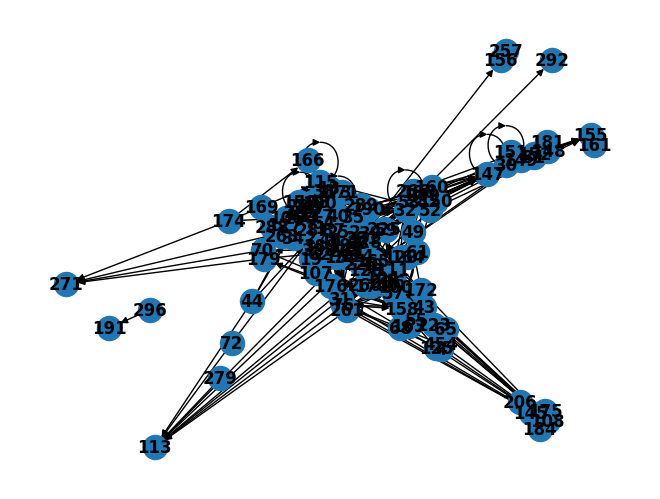

In [11]:
G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw(G, with_labels=True, font_weight='bold')

As we can see in the plot trying to check some paths and stablish some bus lines, it is imposible to get two consequent edges between three or more nodes. Moreover bus lines can share the same source but had different destinations and vice versa:

In [12]:
sells_test = sells.loc[
    (sells["linea"] == 18)&
    (sells["sentido"] == 1)
].copy()
sells_test[["horaser", "norigen", "ndestino"]].drop_duplicates()

,horaser,norigen,ndestino
34491,500,174,271
51969,500,54,271
67254,500,70,271
83162,500,179,271
92757,633,70,271
92758,633,54,271


## Network Approximation by Demand

In [13]:
line_plot = []
profit = []
demand = []
way_1_length = []
way_2_length = []
for iter_line in bus_lines.keys():
    line_plot.append(f"L_{iter_line}")
    profit.append(bus_lines[iter_line]["profit"])
    demand.append(bus_lines[iter_line]["demand"])
    way_1_length.append(len(bus_lines[iter_line][1]["arcs"]))
    try:
        way_2_length.append(len(bus_lines[iter_line][2]["arcs"]))
    except KeyError:
        way_2_length.append(0)

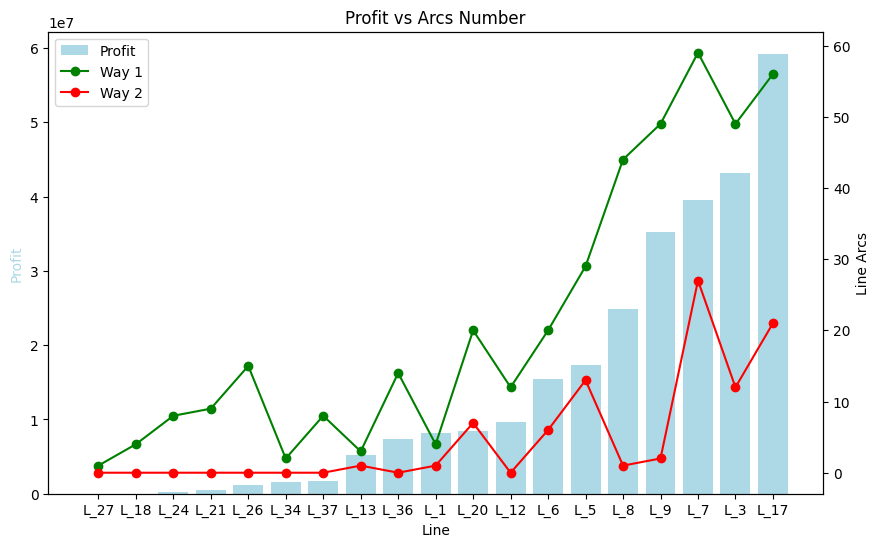

In [14]:
plotting_df = pd.DataFrame(
    {
        "line_plot": line_plot,
        "profit": profit,
        "demand": demand,
        "way_1_length": way_1_length,
        "way_2_length": way_2_length,
    }
)

plotting_df.sort_values("profit", inplace=True)

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart on ax1
ax1.bar(plotting_df.line_plot, plotting_df.profit, color='lightblue', label='Profit')

# Create another axis for the line charts sharing the x-axis
ax2 = ax1.twinx()

# Plot the two lines on ax2
ax2.plot(plotting_df.line_plot, plotting_df.way_1_length, color='green', marker='o', label='Way 1')
ax2.plot(plotting_df.line_plot, plotting_df.way_2_length, color='red', marker='o', label='Way 2')

# Add legends and labels
ax1.set_xlabel('Line')
ax1.set_ylabel('Profit', color='lightblue')
ax2.set_ylabel('Line Arcs', color='black')

# Combine the legends of both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.title('Profit vs Arcs Number')
plt.show()

General information about sells DB shows that Line 9, 7, 3 and 17 represents the main paths for the company benefits.

In [15]:
grouped_line_demand = {}
split_minutes = 5
for line in bus_lines_15.keys():
    
    for way in bus_lines_15[line].keys():
        line_way_hours = list(bus_lines_15[line][way].keys())
        line_way_hours.sort()
        hours = []
        demand = []
        for index_service, service_hour in enumerate(line_way_hours):
            if service_hour >= 500 and  service_hour <= 2000:
                service_hour_split = service_hour - service_hour%split_minutes
                try:
                    next_hour_split = line_way_hours[index_service+1] - (line_way_hours[index_service+1]%split_minutes)
                except:
                    next_hour_split = (service_hour_split + 100)
                iterations = min(int(next_hour_split-service_hour)/split_minutes, int(60/split_minutes))
                service_demand = 0
                for node in (bus_lines_15[line][way][service_hour].keys()):
                    service_demand += bus_lines_15[line][way][service_hour][node]["avg_demand"]
                    
                try:
                    base_hour = service_hour_split
                    for sp in range(int(iterations)):
                        sp_hour = base_hour + split_minutes*sp
                        if abs(sp_hour) % 100 < 60: 
                            hours.append(sp_hour)
                        else:
                            base_hour = sp_hour + (100 - sp_hour%100)
                            hours.append(base_hour)
                        demand.append(max(1, round(service_demand/iterations)))
                except:
                    import ipdb; ipdb.set_trace()
        bus_line = grouped_line_demand.get(line, {})
        bus_line[way] = {
            "hours": hours,
            "demand": demand,
        }
        grouped_line_demand[line] = bus_line

In [16]:
# Save model data transformed
with open("data_model.json", "w", encoding="utf-8") as f:
    json.dump(grouped_line_demand, f, ensure_ascii=False, indent=4)

In [17]:
# Initialize dict to store line-information
total_demand_line = {}
# Iterate line
for line in grouped_line_demand.keys():
    # Iterate all ways in line
    for way in grouped_line_demand[line].keys():
        # Iterate hours
        for i, hour in enumerate(grouped_line_demand[line][way]["hours"]):
            # Get back bus line information
            bus_line = total_demand_line.get(line, {})
            # Get demand in specific time
            demand_hour = bus_line.get(hour, 0)
            # Accumulate information of hour demand
            bus_line[hour] = demand_hour + grouped_line_demand[line][way]["demand"][i]
            # Store new information back
            total_demand_line[line] = bus_line

# Check max line demand hours
max_hours = []
bus_max = 0
for bus_line in total_demand_line.keys():
    if len(list(total_demand_line[bus_line].keys())) > len(max_hours):
        max_hours = list(total_demand_line[bus_line].keys())
        bus_max = bus_line

hour_df = []
# Fill demand missing
for hour in max_hours:
    lines_dict = {"hour": hour}
    for bus_line in total_demand_line.keys():
        lines_dict[f"L_{bus_line}"] = total_demand_line[bus_line].get(hour, 0)
    hour_df.append(lines_dict)

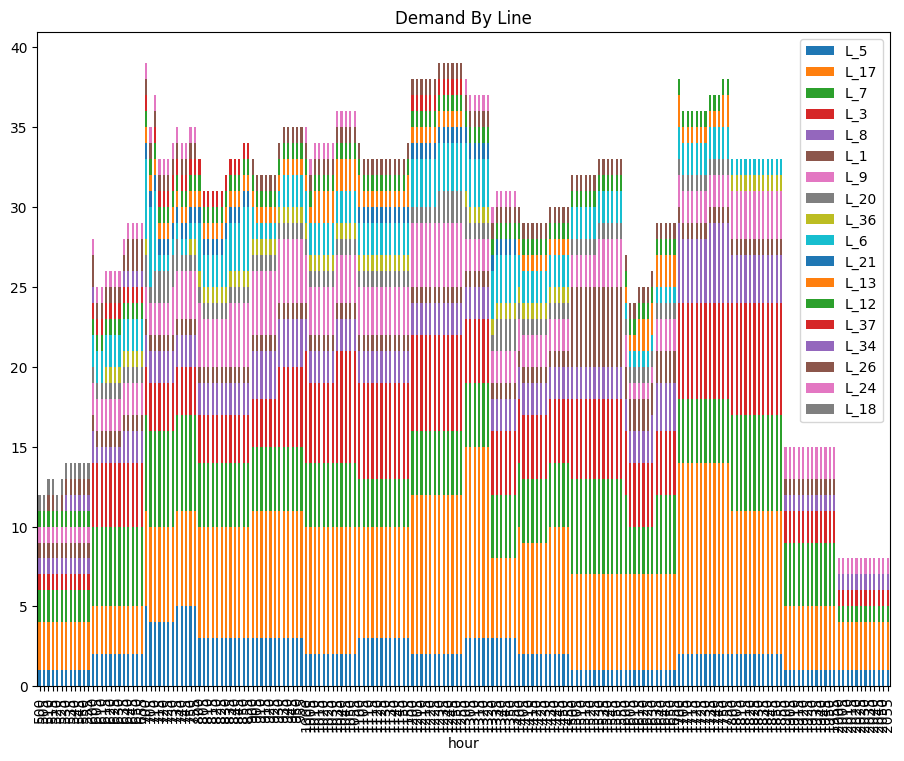

In [18]:
df_demand_hour_line = pd.DataFrame(hour_df)
df_demand_hour_line.plot(
    x='hour',
    kind='bar',
    stacked=True,
    title='Demand By Line',
    figsize=(11,8.5)
)
plt.show()

To approximate the problem to a graph, discretisation of time is take account representating the posible number of stops for busline and also the possible departure time for each bus $k$ of line $i$. On the other hand, a graphic confirmation is evident about the four lines that represent the most profitable paths and will be the focus of the solution.